In [132]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [302]:
df = pd.read_csv('/Users/lyu/Downloads/clean_data_28days.csv')

In [278]:
df['Fraction_cement'] = df.apply(lambda row:100- row['Coarse Agg Percentage']-row['Fine Agg Percentage']-row['%Fly Ash'], axis = 1)
df = df[['W/(C+P)','Fraction_cement','Fine Agg Percentage','%Fly Ash','AEA Dose (oz/cwt)','TYPE AWRA Dose (oz/cwt)','28 Day']]
df= shuffle(df, random_state = 42)
X = df.drop(['28 Day'], axis=1)
scaler = StandardScaler()  
Xscaled = scaler.fit(X)
X = Xscaled.transform(X)
Y = df['28 Day']
Yscaled = scaler.fit(np.asarray([Y]).T)
Y = Yscaled.transform(np.asarray([Y]).T)

In [279]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [218]:
X_train

array([[-0.03158993,  0.60553452,  0.18873805, -0.74386918, -1.59908653,
        -1.75048127],
       [-0.95793745, -0.93964148, -0.61865022,  1.39136436, -0.07703879,
         0.3668004 ],
       [-1.42111121, -0.7620413 ,  0.589487  ,  0.15031455, 10.01095204,
        -1.75048127],
       ...,
       [ 1.8211051 , -0.10273452,  0.96740453, -1.71735671, -1.59908653,
        -0.14792722],
       [ 1.35793134, -0.97148463, -0.16676552,  0.30366077, -0.11243525,
         0.35618746],
       [ 1.35793134,  0.51441636,  0.9283784 , -1.71735671, -1.59908653,
         0.37741334]])

In [280]:
n2 = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',max_iter=10000,random_state=1,solver='lbfgs').fit(X_train, Y_train)

/Users/lyu/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
cr = cross_validate(n2, X, y=Y, scoring='r2', cv=5)

/Users/lyu/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lyu/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lyu/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lyu/opt/anaconda3/envs/deep-learning/lib/pyth

In [152]:
cr

array([[6010.],
       [6040.],
       [8080.],
       ...,
       [5430.],
       [4650.],
       [5060.]])

In [281]:
pred = Yscaled.inverse_transform(n2.predict(X_train).flatten())
Y_train = Yscaled.inverse_transform(Y_train)
r2_score(Y_train, pred)

0.6391382336138276

In [282]:
np.mean(np.abs(pred - Y_train)/pred)

0.17362334125077497

In [283]:
np.sqrt(mean_squared_error(pred, Y_train))*0.00689

4.280809697693104

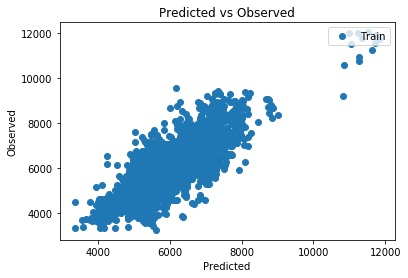

In [284]:
plt.plot(pred, Y_train, 'o')
plt.title('Predicted vs Observed')
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.legend(['Train'], loc='upper right')
plt.show()

In [272]:
pred = Yscaled.inverse_transform(n2.predict(X_test).flatten())
Y_test = Yscaled.inverse_transform(Y_test)

In [273]:
r2_score(Y_test, pred)

0.5956652126211881

In [274]:
np.mean(np.abs(pred - Y_test)/pred)

0.1738794572815852

In [275]:
np.sqrt(mean_squared_error(pred, Y_test))*0.00689

4.5063671627216895

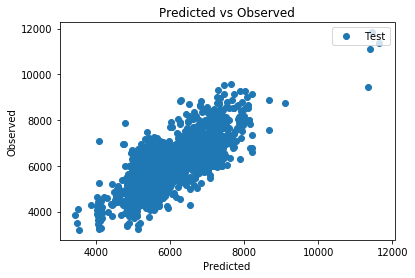

In [276]:
plt.plot(pred, Y_test, 'o')
plt.title('Predicted vs Observed')
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.legend(['Test'], loc='upper right')
plt.show()

In [303]:
df['Fraction_cement'] = df.apply(lambda row:100- row['Coarse Agg Percentage']-row['Fine Agg Percentage']-row['%Fly Ash'], axis = 1)
df = df[['W/(C+P)','Fraction_cement','Fine Agg Percentage','%Fly Ash','AEA Dose (oz/cwt)','TYPE AWRA Dose (oz/cwt)','28 Day']]
sorted_df = df.sort_values(by=['28 Day'])
length = len(sorted_df)
index = length//4
X = sorted_df.drop(['28 Day'], axis=1)
scaler = StandardScaler()  
Xscaled = scaler.fit(X)
X = Xscaled.transform(X)
Y = sorted_df['28 Day']
Yscaled = scaler.fit(np.asarray([Y]).T)
Y = Yscaled.transform(np.asarray([Y]).T)

X_small = X[:(3*index),:]
X_large = X[(3*index):,:]
X_small = shuffle(X_small, random_state = 42)
X_large = shuffle(X_large, random_state = 42)
Y_small = Y[:(3*index),:]
Y_large = Y[(3*index):,:]
#Y_small = shuffle(Y_small, random_state = 42)
#Y_large = shuffle(Y_large, random_state = 42)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a457a9550>,
 'caps': [<matplotlib.lines.Line2D at 0x119595cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a457a9e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a46212890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a4612d710>],
 'means': []}

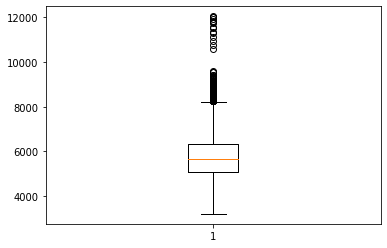

In [175]:
plt.boxplot(sorted_df.iloc[:,6])

In [299]:
Yscaled.inverse_transform(Y_small)

array([[3200.],
       [3230.],
       [3240.],
       ...,
       [6340.],
       [6340.],
       [6340.]])

In [304]:
n1 = MLPRegressor(hidden_layer_sizes=(15),activation='logistic',max_iter=100000,random_state=1,solver='lbfgs').fit(X_small, Y_small)

/Users/lyu/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [288]:
pred = Yscaled.inverse_transform(n1.predict(X_small).flatten())
Y_small = Yscaled.inverse_transform(Y_small)
#pred = n1.predict(X_small).flatten()
1 - np.sum((pred - Y_small) ** 2)/np.sum((Y_small - np.mean(Y_small)) ** 2)
r2_score(Y_small, pred)

0.37474756280161625

In [289]:
np.mean(np.abs(pred - Y_small)/pred)

0.10798887558162477

In [290]:
np.sqrt(mean_squared_error(pred, Y_small))*0.00689

3.2819166126698907

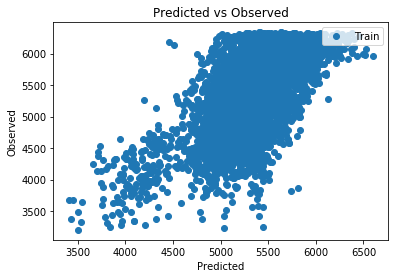

In [291]:
plt.plot(pred, Y_small, 'o')
plt.title('Predicted vs Observed')
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.legend(['Train'], loc='upper right')
plt.show()

In [305]:
pred = Yscaled.inverse_transform(n1.predict(X_large).flatten())
Y_large = Yscaled.inverse_transform(Y_large)
#1 - sum((pred - Yscaled.inverse_transform(Y_large)) ^ 2)/sum((Yscaled.inverse_transform(Y_large) - mean(Yscaled.inverse_transform(Y_large))) ^ 2)
#mean(abs((pred) - Yscaled.inverse_transform(Y_large))/pred)
#sqrt(mean((pred*0.00689 - Yscaled.inverse_transform(Y_large)*0.00689)^2))
r2_score(Y_large, pred)

-5.2226534784604

In [306]:
a=0.00689476*Y_large
b=0.00689476*pred
RM = -(np.sqrt(mean_squared_error(a,b)))
return RM

#def MAPE(Y_large, pred):
#    a=0.00689476*Y_large
#     b=0.00689476*pred
#return -(np.mean(np.abs((a - b) / a)) * 100)
#np.mean(np.abs(pred - Y_large)/pred)
#MAPE(Y_large, pred)

SyntaxError: 'return' outside function (<ipython-input-306-28cbc107498b>, line 4)

In [263]:
np.sqrt(mean_squared_error(pred, Y_large))*0.00689

10.142597686531545

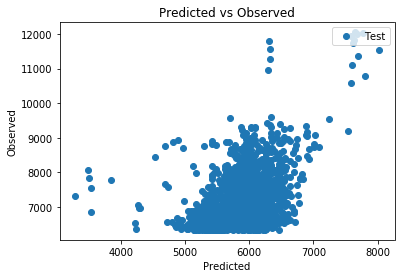

In [264]:
plt.plot(pred, Y_large, 'o')
plt.title('Predicted vs Observed')
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.legend(['Test'], loc='upper right')
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [32]:
model = Sequential([
    Dense(15, activation='relu', input_shape=(6,)),
    Dense(1, activation='sigmoid'),
])

In [33]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [40]:
hist = model.fit(X_small, Y_small,
          batch_size=10, epochs=15)

Epoch 1/15
5580/5580 [==============================] - 1s 143us/step - loss: 28609035.4731 - mae: 5314.7114
Epoch 2/15
5580/5580 [==============================] - 1s 145us/step - loss: 28609035.4767 - mae: 5314.7114
Epoch 3/15
5580/5580 [==============================] - 1s 136us/step - loss: 28609035.4946 - mae: 5314.7114
Epoch 4/15
5580/5580 [==============================] - 1s 129us/step - loss: 28609035.5197 - mae: 5314.7114
Epoch 5/15
5580/5580 [==============================] - 1s 144us/step - loss: 28609035.5627 - mae: 5314.7114
Epoch 6/15
5580/5580 [==============================] - 1s 128us/step - loss: 28609035.5125 - mae: 5314.7114
Epoch 7/15
5580/5580 [==============================] - 1s 130us/step - loss: 28609035.5699 - mae: 5314.7114
Epoch 8/15
5580/5580 [==============================] - 1s 131us/step - loss: 28609035.5484 - mae: 5314.7114
Epoch 9/15
5580/5580 [==============================] - 1s 139us/step - loss: 28609035.4731 - mae: 5314.7114
Epoch 10/15
5580/55

In [41]:
model.evaluate(X_large, Y_large)[1]

1861/1861 [==============================] - 0s 33us/step


7157.74267578125

In [42]:
pred = model.predict(X_large)

KeyError: 'val_loss'

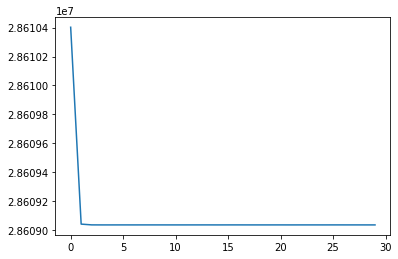

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

KeyError: 'val_mae'

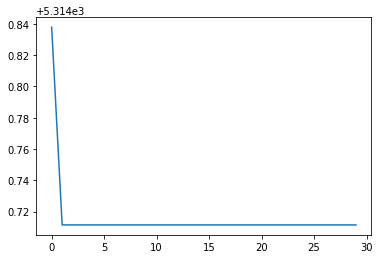

In [38]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()